In [17]:
import pickle
import sys
import os
import numpy as np
from scipy.integrate import simps
from scipy import interpolate, integrate
import matplotlib.pyplot as plt
sys.path.append(r"E:\Dropbox (Weizmann Institute)\Lab\Code\Python Scripts Jupyter") ## add this folder to the environment 
from entities_v2 import GCaMPData ,LimbData, Frame, Clip, Experiment


In [18]:
filename = 'M329_eEPA_R_adBNST'  # The same filename you used when saving
data_folder = r'Z:\UriMons\Fiber Photometry\GCaMP\adBNST_eEPA_GCaMP8s\Processed_Data\All_pikles'
pkl=os.path.join(data_folder, filename)
# Load the object from the pickle file
with open(f'{pkl}.pkl', 'rb') as f:
    loaded_object : Experiment = pickle.load(f)

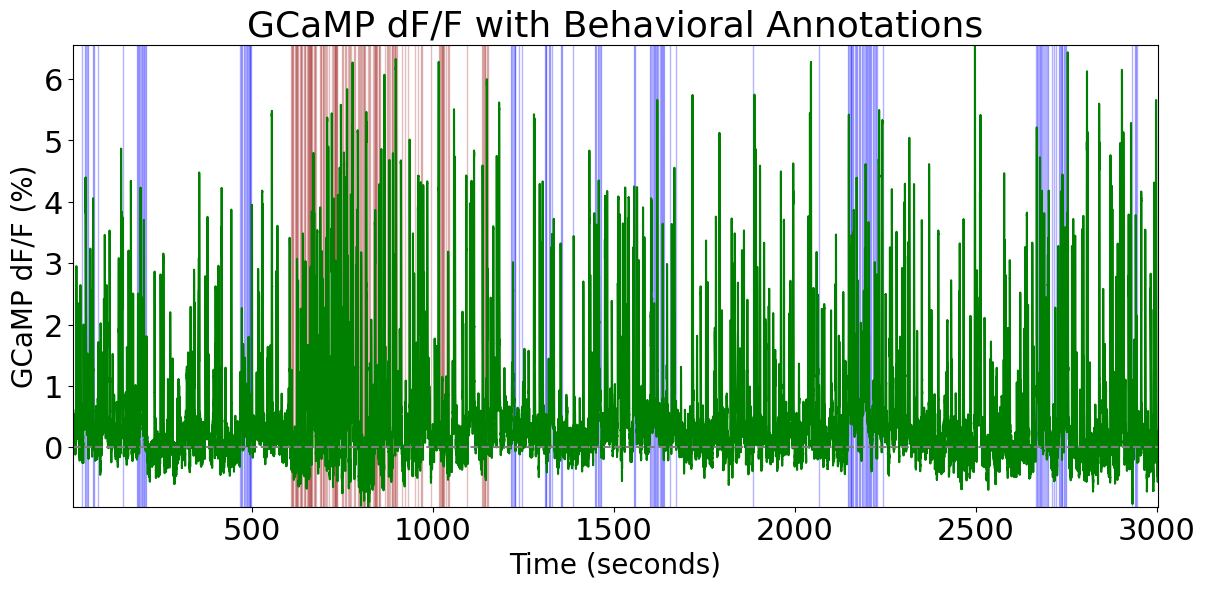

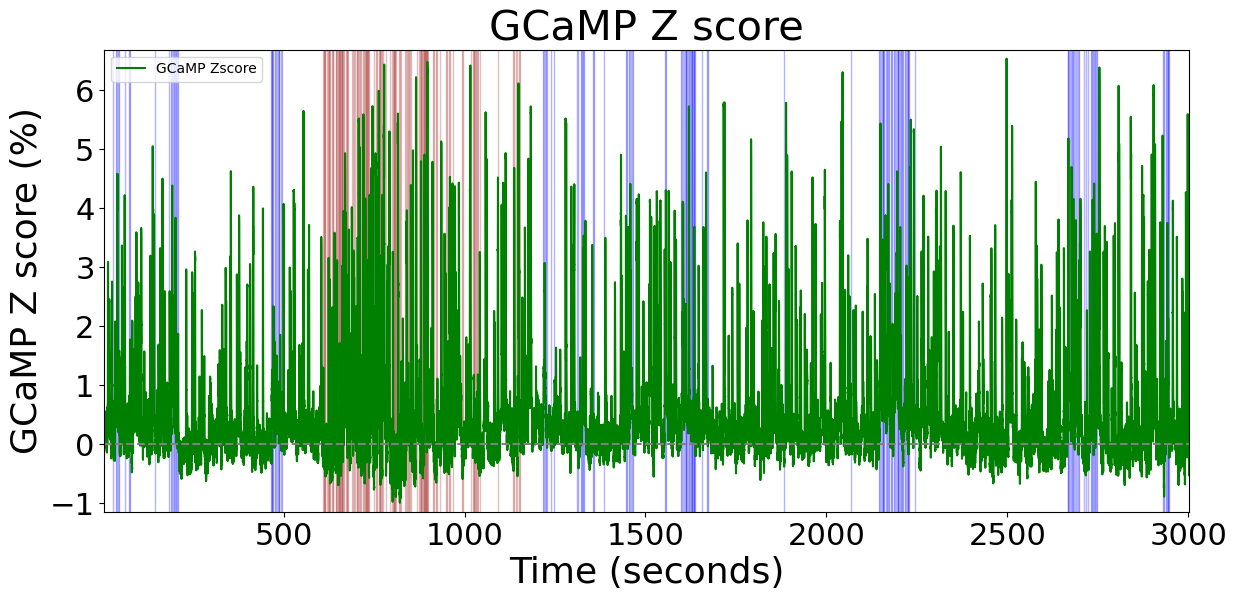

('M329', 'Sapap(WT); CRH(Hetro)', 'M', 'eEPA')

In [19]:
loaded_object.plot_gcamp_with_annotations()
loaded_object.plot_gcamp_zscore_with_annotations()
ID = loaded_object.Mouse_id
Gen = loaded_object.Genotype
Para = loaded_object.paradigm
Sex = loaded_object.Sex
ID, Gen, Sex, Para

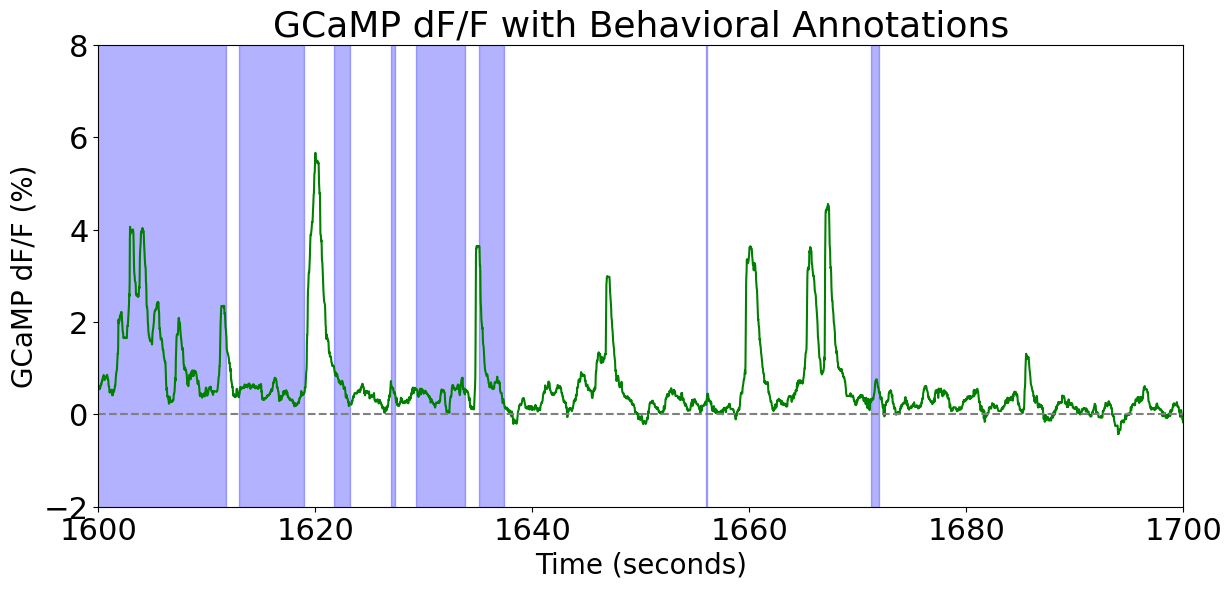

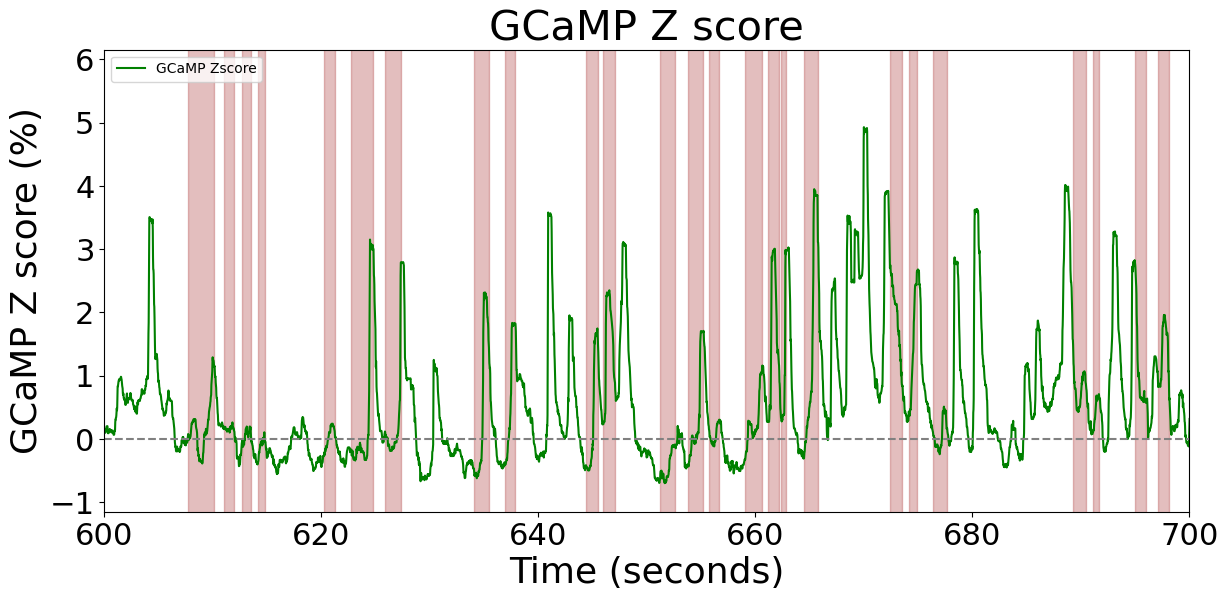

In [20]:
#Zoom in (seconds)
loaded_object.plot_gcamp_with_annotations(None,1600,1700, -2, 8)
loaded_object.plot_gcamp_zscore_with_annotations(None, 600, 700, -1, 6)


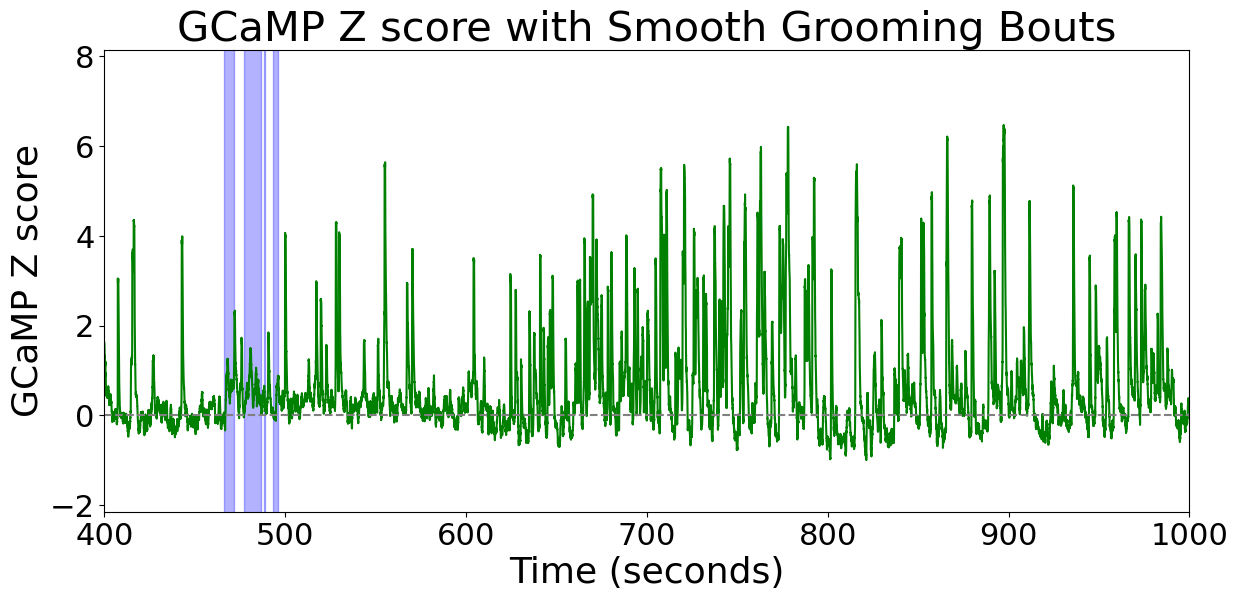

In [21]:
loaded_object.smooth_grooming_bouts_generator()
loaded_object.plot_gcamp_zscore_with_smooth_grooming_bouts(xlim_start=400,xlim_end=1000, ylim_start=-2,ylim_end= 8)

In [22]:
## Test for smoothing bout function 
# loaded_object.behavioral_annotations["Grooming_annotations"] = [(500, 600), (100, 200), (250, 300)]
# loaded_object.smooth_grooming_bouts_generator(threshold=90)
# smooth_grooming_annotations = loaded_object.smooth_grooming_bouts
# print("Smoothed Grooming Bouts:", smooth_grooming_annotations)

In [23]:
# Access the raw grooming annotations
grooming_annotations = loaded_object.Grooming_annotations
print("Grooming Annotations:", grooming_annotations)

# Count the number of grooming bouts in raw annotations
grooming_annotations_count = len(grooming_annotations) if grooming_annotations else 0
print("Number of Grooming Bouts:", grooming_annotations_count)

# Generate smoothed grooming bouts
loaded_object.smooth_grooming_bouts_generator(threshold=90)

# Access the smoothed grooming bouts
smooth_grooming_annotations = loaded_object.smooth_grooming_bouts
print("Smoothed Grooming Bouts:", smooth_grooming_annotations)

# Count the number of smoothed grooming bouts
smooth_grooming_annotations_count = len(smooth_grooming_annotations) if smooth_grooming_annotations else 0
print("Number of Smoothed Grooming Bouts:", smooth_grooming_annotations_count)


Grooming Annotations: [(894, 902), (1140, 1391), (1848, 1871), (2221, 2231), (4337, 4344), (5487, 5531), (5656, 5904), (5980, 5994), (6067, 6220), (13985, 14042), (14079, 14153), (14324, 14590), (14653, 14660), (14795, 14811), (14842, 14885), (36511, 36773), (36834, 36848), (37151, 37156), (37393, 37406), (39304, 39350), (39375, 39388), (39648, 39735), (39846, 39899), (40651, 40699), (41574, 41580), (43415, 43493), (43668, 43948), (46647, 46735), (47981, 48354), (48388, 48568), (48652, 48695), (48809, 48819), (48877, 49013), (49052, 49122), (49679, 49684), (50137, 50158), (56514, 56520), (62014, 62023), (64381, 64651), (64688, 64803), (64950, 64973), (65053, 65193), (65328, 65429), (65562, 65925), (65962, 66158), (66244, 66325), (66473, 66728), (66782, 66814), (67330, 67342), (79990, 80008), (80054, 80359), (80447, 80967), (81317, 81323), (81491, 81497), (81671, 81690), (81899, 82025), (82107, 82128), (82155, 82163), (82293, 82440), (87934, 87986), (88185, 88280), (88348, 88386)]
Numbe

Animation saved to Z:\UriMons\Fiber Photometry\GCaMP\adBNST_eEPA_GCaMP8s\Processed_Data\All_pikles\M329_gcamp_animation_18600_19200.avi


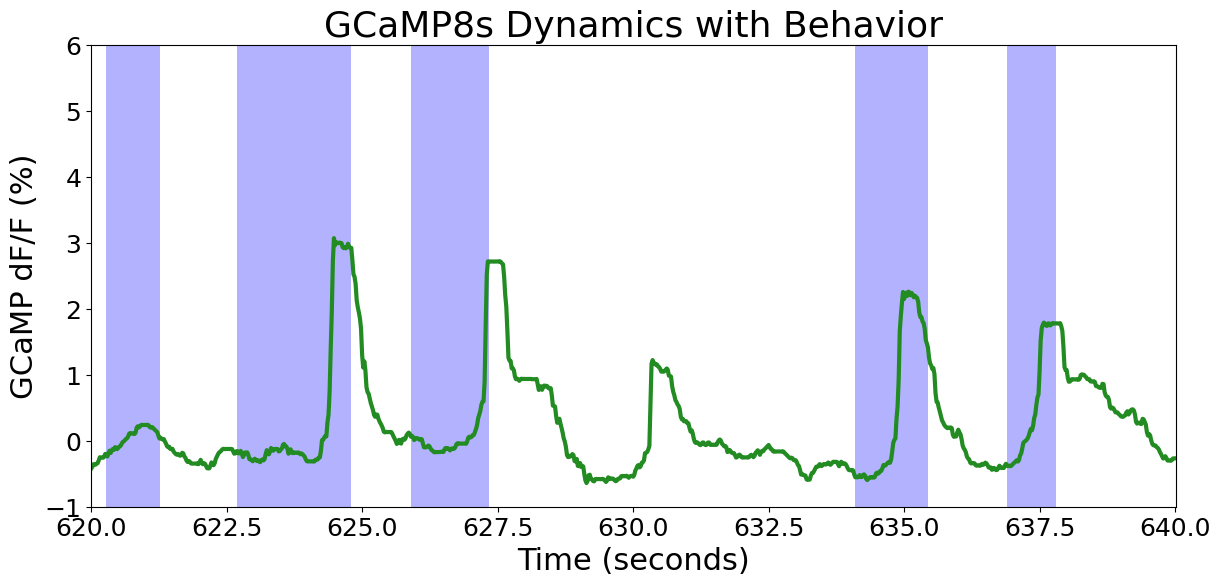

In [24]:
# # # Create video of GCaMP trace
# # start_frame = 17100
# # end_frame = 18900
# # animation_video_duration = (end_frame - start_frame)// 30
# # animation_file_path =os.path.join(data_folder,f"{loaded_object.Mouse_id}_gcamp_animation_{start_frame}_{end_frame}.avi") 
# # loaded_object.animate_gcamp_with_behavioral_annotations(start_frame,end_frame, video_fps=loaded_object.GCaMP_data.sample_rate, video_duration=animation_video_duration, output_path=animation_file_path, annotations= loaded_object.Grooming_annotations)

# Create video of GCaMP trace with manual y-axis limits
start_frame = 18600
end_frame = 19200
animation_video_duration = (end_frame - start_frame) // 30
animation_file_path = os.path.join(data_folder, f"{loaded_object.Mouse_id}_gcamp_animation_{start_frame}_{end_frame}.avi")
y_axis_limits = (-1, 6)  # Set your desired y-axis range

loaded_object.animate_gcamp_with_behavioral_annotations(
    start_frame,
    end_frame,
    video_fps=loaded_object.GCaMP_data.sample_rate,
    video_duration=animation_video_duration,
    output_path=animation_file_path,
    annotations=loaded_object.Headipping_annotations,
    y_limits=y_axis_limits
)


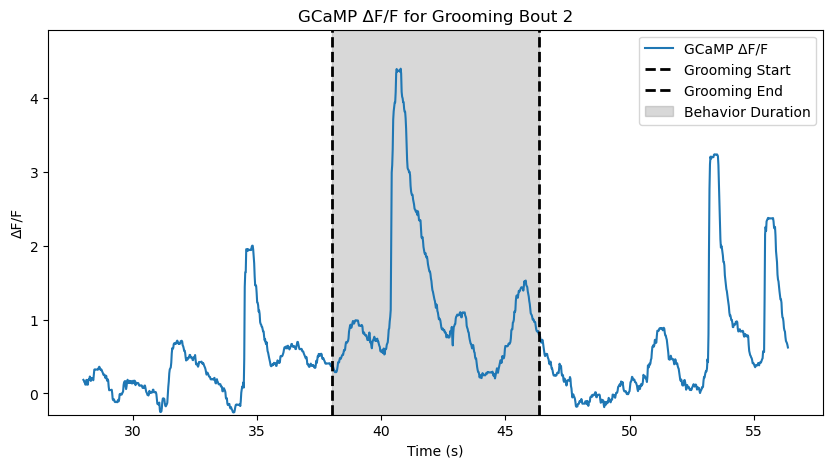

In [25]:
# Set the index of the desired grooming bout and extra time margins
bout_index = 1  # Change to the index of the grooming bout you want
extra_time_before = 10  # Extra seconds before the bout starts
extra_time_after = 10   # Extra seconds after the bout ends

# Load ΔF/F and time data for the specified bout
gcamp_data = loaded_object.get_gcamp_data_for_annotations(
    categories=["Grooming_annotations"],  # Specify the category
    n=bout_index + 1,  # Ensure we get at least this many bouts
    extra_time_before=extra_time_before,
    extra_time_after=extra_time_after
)

# Extract the list of (gcamp_dF_F, time_seconds) tuples for Grooming_annotations
grooming_bouts = gcamp_data.get("Grooming_annotations", [])

# Ensure the requested bout index is within range
if bout_index >= len(grooming_bouts):
    raise IndexError(f"Bout index {bout_index} is out of range. Only {len(grooming_bouts)} bouts available.")

# Unpack the data for the chosen bout
gcamp_dF_F, time_seconds = grooming_bouts[bout_index]

# Fetch the start and end frames for the chosen bout
start_frame, end_frame = loaded_object.Grooming_annotations[bout_index]  # Use the property

# Convert frames to seconds (assuming 30 fps)
start_time = start_frame / 30.0
end_time = end_frame / 30.0

# Calculate dynamic y-axis limits with a 10% margin
y_min = min(gcamp_dF_F) - 0.12 * abs(min(gcamp_dF_F))
y_max = max(gcamp_dF_F) + 0.12 * abs(max(gcamp_dF_F))

# Plot the ΔF/F trace
plt.figure(figsize=(10, 5))
plt.plot(time_seconds, gcamp_dF_F, label='GCaMP ΔF/F')

# Mark the start and end of the behavioral event
plt.axvline(start_time, color='k', linestyle='--', linewidth=2, label='Grooming Start')
plt.axvline(end_time, color='k', linestyle='--', linewidth=2, label='Grooming End')

# Highlight the event duration
plt.fill_betweenx(
    [y_min, y_max], start_time, end_time, color='gray', alpha=0.3, label='Behavior Duration'
)

# Add labels, legend, and title
plt.xlabel('Time (s)')
plt.ylabel('ΔF/F')
plt.title(f'GCaMP ΔF/F for Grooming Bout {bout_index + 1}')
plt.legend()

# Set dynamic y-axis limits
plt.ylim(y_min, y_max)

# Show the plot
plt.show()


GCaMP Trace Before & During Grooming Bout

In [26]:
# This code detect grooming bouts by their duration (if they are longer than x)

#  Define parameters
frame_rate = 30  # frames per second
min_bout_length_seconds = 1.5
min_frame_length = frame_rate * min_bout_length_seconds

# Ensure grooming annotations exist in the loaded object
if not loaded_object.Grooming_annotations:
    print("No grooming annotations available.")
else:
    # Filter grooming bouts longer than the minimum length
    valid_bouts = [(start, end) for start, end in loaded_object.Grooming_annotations if (end - start) >= min_frame_length]

    # Initialize a list to store the results
    grooming_traces = []

    # Extract GCaMP data for each valid bout
    for start_frame, end_frame in valid_bouts:
        gcamp_dF_F, time_seconds = loaded_object.get_gcamp_data(start_frame, end_frame)
        grooming_traces.append((gcamp_dF_F, time_seconds))

    # Print the results
    print(f"Number of grooming bouts longer than {min_bout_length_seconds} seconds ({min_frame_length} frmaes): {len(valid_bouts)}")
    print("Frame ranges of valid bouts:", valid_bouts)


Number of grooming bouts longer than 1.5 seconds (45.0 frmaes): 32
Frame ranges of valid bouts: [(1140, 1391), (5656, 5904), (6067, 6220), (13985, 14042), (14079, 14153), (14324, 14590), (36511, 36773), (39304, 39350), (39648, 39735), (39846, 39899), (40651, 40699), (43415, 43493), (43668, 43948), (46647, 46735), (47981, 48354), (48388, 48568), (48877, 49013), (49052, 49122), (64381, 64651), (64688, 64803), (65053, 65193), (65328, 65429), (65562, 65925), (65962, 66158), (66244, 66325), (66473, 66728), (80054, 80359), (80447, 80967), (81899, 82025), (82293, 82440), (87934, 87986), (88185, 88280)]


In [27]:
# This code iterate over the time before the bout and checks that there isn't another bout in it

# Define the pre-bout check duration and frame-related variables
pre_bout_seconds = 6  # Check for grooming within this time before each bout
pre_bout_frames = pre_bout_seconds * frame_rate  # Convert to frames

# Initialize the list for filtered bouts
filtered_bouts = []

# Loop over valid bouts and filter out those with grooming bouts in the 10 seconds before
for start_frame, end_frame in valid_bouts:
    # Check if any other grooming bout ends within the 10-second window before this bout starts
    has_grooming_before = any(
        other_end_frame > (start_frame - pre_bout_frames) and other_end_frame <= start_frame
        for other_start_frame, other_end_frame in loaded_object.Grooming_annotations
        if (other_start_frame, other_end_frame) != (start_frame, end_frame)
    )

    # If no grooming bout is found within the 10-second window, add the bout to filtered_bouts
    if not has_grooming_before:
        filtered_bouts.append((start_frame, end_frame))

# Output results
print(f"Number of filtered bouts: {len(filtered_bouts)}")
print("Frame ranges of filtered bouts:", filtered_bouts)

Number of filtered bouts: 13
Frame ranges of filtered bouts: [(1140, 1391), (13985, 14042), (36511, 36773), (39304, 39350), (39648, 39735), (40651, 40699), (43415, 43493), (46647, 46735), (47981, 48354), (64381, 64651), (81899, 82025), (87934, 87986), (88185, 88280)]


In [28]:
# Extract traces including the pre-bout period for each filtered bout
filtered_traces = []
for start_frame, end_frame in filtered_bouts:
    # Include the pre-bout period
    extended_start_frame = max(0, start_frame - pre_bout_frames)

    # Get GCaMP data for the full extended frame range
    gcamp_dF_F, time_seconds = loaded_object.get_gcamp_data(extended_start_frame, end_frame)

    # Validate and truncate the trace if necessary to remove any extra frames
    expected_trace_length = (end_frame - extended_start_frame) + 1  # Total expected frames
    if len(gcamp_dF_F) > expected_trace_length:
        gcamp_dF_F = gcamp_dF_F[:expected_trace_length]
        time_seconds = time_seconds[:expected_trace_length]

    # Append the truncated trace
    filtered_traces.append((gcamp_dF_F, time_seconds))

# Find the shortest bout from the filtered bouts
shortest_bout = min(filtered_bouts, key=lambda bout: bout[1] - bout[0])

# Calculate the length of the shortest bout in frames and seconds
shortest_bout_length_frames = shortest_bout[1] - shortest_bout[0]
shortest_bout_length_seconds = shortest_bout_length_frames / frame_rate

# Output results
print(f"Shortest bout length: {shortest_bout_length_frames} frames ({shortest_bout_length_seconds:.2f} seconds)")

Shortest bout length: 46 frames (1.53 seconds)


In [29]:
# # Display the shape information for each trace and bout in filtered_traces
# for i, ((gcamp_dF_F, time_seconds), (start_frame, end_frame)) in enumerate(zip(filtered_traces, filtered_bouts)):
#     # Calculate the total length of the trace
#     trace_length = len(gcamp_dF_F)

#     # The bout starts at pre_bout_frames from the beginning of the trace
#     bout_start_index = pre_bout_frames  # This assumes pre-bout frames were included

#     # Calculate lengths of pre-bout and during-bout periods
#     pre_bout_length = min(bout_start_index, trace_length)  # Handle case if pre-bout is larger than trace
#     bout_length = trace_length - pre_bout_length

#     # Output details for each trace and bout
#     print(f"Trace {i + 1}:")
#     print(f"  - Start frame = {start_frame}, End frame = {end_frame}")
#     print(f"  - Total trace length = {trace_length} frames ({trace_length/ frame_rate:.2f} seconds)")
#     print(f"  - Pre-bout length = {pre_bout_length} frames ({pre_bout_length / frame_rate:.2f} seconds)")
#     print(f"  - During-bout length = {bout_length} frames ({bout_length / frame_rate:.2f} seconds)")

# # Print total number of traces
# print(f"\nTotal number of filtered traces: {len(filtered_traces)}")


In [30]:
# Define the threshold percentile (e.g., allow up to 10% of the values to remain below zero)
# percentile_threshold  = 100

# Initialize a list to store aligned and shifted traces
aligned_filtered_traces = []

# Align each bout to time zero and include pre-bout data
for start_frame, end_frame in filtered_bouts:
    # Calculate the extended start frame to include the pre-bout period
    extended_start_frame = max(0, start_frame - pre_bout_frames)

    # Get GCaMP data from the extended start frame to the end of the bout
    gcamp_dF_F, time_seconds = loaded_object.get_gcamp_data(extended_start_frame, end_frame)

    # Calculate the start time of the grooming bout relative to the extended data
    bout_start_time = start_frame / frame_rate

    # Align the time array to make bout start time equal to zero
    aligned_time = time_seconds - bout_start_time

    # Check if more than 10% of the values are below zero
    below_zero_count = np.sum(gcamp_dF_F < 0)
    percent_below_zero = (below_zero_count / len(gcamp_dF_F)) * 100

    # if percent_below_zero > percentile_threshold:
    #     # Calculate the 10th percentile value
    #     shift_value = np.percentile(gcamp_dF_F, percentile_threshold)

    #     # Only shift if the 10th percentile value is negative
    #     if shift_value < 0:
    #         gcamp_dF_F -= shift_value  # Shift to ensure only 10% remains below zero

    # Store the aligned and shifted trace
    aligned_filtered_traces.append((gcamp_dF_F, aligned_time))

# The traces are now properly aligned and shifted as per the threshold requirement


In [31]:
# Generate the time points for the entire trace (pre-bout to end of shortest bout)
avg_time = np.linspace(-pre_bout_seconds, min_bout_length_seconds, int((pre_bout_seconds + min_bout_length_seconds) * frame_rate))

# Initialize a list to store interpolated traces
interpolated_traces = []

# Interpolate each trace onto the common time points
for gcamp_dF_F, aligned_time in aligned_filtered_traces:
    # Interpolate the trace to match the common time points
    interpolated_trace = np.interp(avg_time, aligned_time, gcamp_dF_F)
    interpolated_traces.append(interpolated_trace)

# Convert to a NumPy array for vectorized operations
interpolated_traces = np.array(interpolated_traces)

# Compute the average trace
avg_deltaF_before_during = np.mean(interpolated_traces, axis=0)

# Compute the standard deviation (SD)
std_deltaF = np.std(interpolated_traces, axis=0)

# Compute the standard error of the mean (SEM)
sem_deltaF = std_deltaF / np.sqrt(interpolated_traces.shape[0])


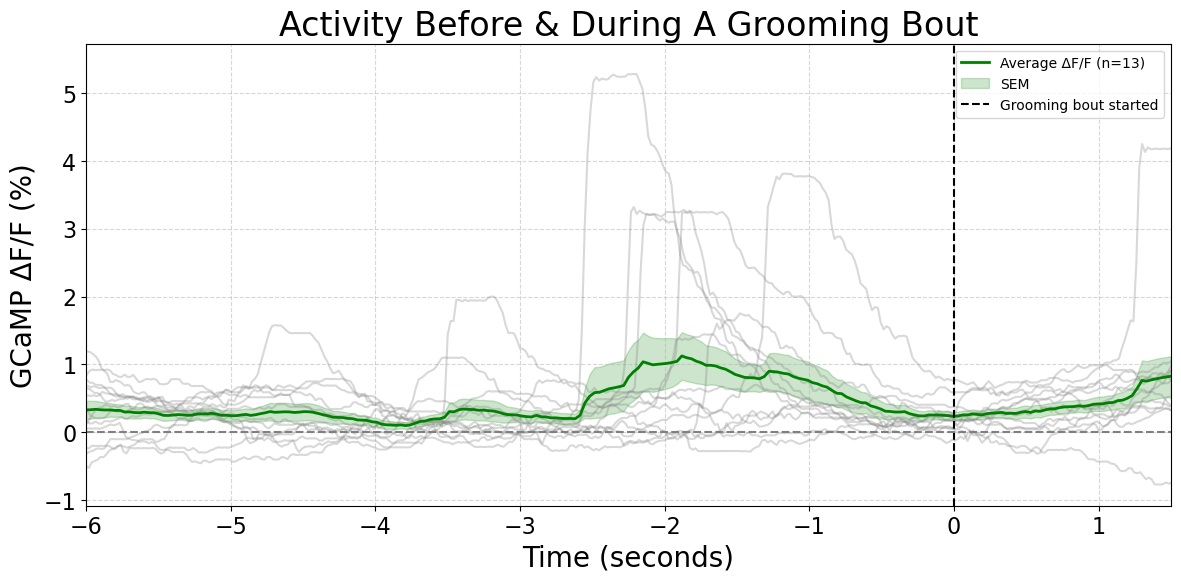

In [32]:
# Plot the average trace along with the individual traces
plt.figure(figsize=(14, 6))

# Plot individual traces
for gcamp_dF_F, aligned_time in aligned_filtered_traces:
    plt.plot(aligned_time, gcamp_dF_F, alpha=0.3, color='gray')

# Plot the average trace
plt.plot(avg_time, avg_deltaF_before_during, color='green', linewidth=2, label=f'Average ΔF/F (n={len(filtered_bouts)})')

# Plot SEM as a shaded area around the average trace
plt.fill_between(avg_time, avg_deltaF_before_during - sem_deltaF, avg_deltaF_before_during + sem_deltaF, 
                 color='green', alpha=0.2, label='SEM')

# Plot aesthetics
plt.axvline(0, color='k', linestyle='--', label='Grooming bout started')  # Time zero line
plt.xlabel('Time (seconds)', fontsize=20)
plt.ylabel('GCaMP ΔF/F (%)', fontsize=20)
plt.title('Activity Before & During A Grooming Bout', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-pre_bout_seconds, min_bout_length_seconds)  # Show from pre-bout to end of shortest bout
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()


GCaMP Trace During & Post Grooming Bout

In [33]:
# This code detects grooming bouts by their duration (if they are longer than x)

#  Define parameters
min_bout_length_seconds = 2
min_frame_length = frame_rate * min_bout_length_seconds

# Ensure grooming annotations exist in the loaded object
if not loaded_object.Grooming_annotations:
    raise ValueError("No grooming annotations available.")
else:
    # Filter grooming bouts longer than the minimum length
    valid_bouts = [(start, end) for start, end in loaded_object.Grooming_annotations if (end - start) >= min_frame_length]

    # Print the results
    print(f"Number of grooming bouts longer than {min_bout_length_seconds} seconds ({min_frame_length} frmaes): {len(valid_bouts)}")
    print("Frame ranges of valid bouts:", valid_bouts)


Number of grooming bouts longer than 2 seconds (60 frmaes): 27
Frame ranges of valid bouts: [(1140, 1391), (5656, 5904), (6067, 6220), (14079, 14153), (14324, 14590), (36511, 36773), (39648, 39735), (43415, 43493), (43668, 43948), (46647, 46735), (47981, 48354), (48388, 48568), (48877, 49013), (49052, 49122), (64381, 64651), (64688, 64803), (65053, 65193), (65328, 65429), (65562, 65925), (65962, 66158), (66244, 66325), (66473, 66728), (80054, 80359), (80447, 80967), (81899, 82025), (82293, 82440), (88185, 88280)]


In [34]:
# Define the post-bout check duration and frame-related variables
post_bout_seconds = 4  # Check for grooming within this time after each bout
post_bout_frames = post_bout_seconds * frame_rate  # Convert to frames

# Initialize the list for filtered bouts
filtered_bouts = []

# Loop over valid bouts and filter out those with grooming bouts in the post-bout window
filtered_bouts = [
    (start_frame, end_frame) for start_frame, end_frame in valid_bouts
    if not any(other_start_frame < (end_frame + post_bout_frames) and other_start_frame >= end_frame
               for other_start_frame, _ in loaded_object.Grooming_annotations
               if (other_start_frame, _) != (start_frame, end_frame))
]

if not filtered_bouts:
    print("No filtered bouts available.")
else:
    shortest_bout = min(filtered_bouts, key=lambda bout: bout[1] - bout[0])

# Extract traces including the post-bout window for each filtered bout
filtered_traces = []
for start_frame, end_frame in filtered_bouts:
    # Include the post-bout window (post_bout_frames) after the bout
    extended_end_frame = end_frame + post_bout_frames
    gcamp_dF_F, time_seconds = loaded_object.get_gcamp_data(start_frame, extended_end_frame)
    filtered_traces.append((gcamp_dF_F, time_seconds))

# Find the shortest bout from the filtered bouts
shortest_bout = min(filtered_bouts, key=lambda bout: bout[1] - bout[0])

# Calculate the length of the shortest bout in frames and seconds
shortest_bout_length_frames = shortest_bout[1] - shortest_bout[0]
shortest_bout_length_seconds = shortest_bout_length_frames / frame_rate

# Output results
print(f"Number of filtered bouts: {len(filtered_bouts)}")
print("Frame ranges of filtered bouts:", filtered_bouts)
print(f"Shortest bout length: {shortest_bout_length_frames} frames ({shortest_bout_length_seconds:.2f} seconds)")


Number of filtered bouts: 13
Frame ranges of filtered bouts: [(1140, 1391), (6067, 6220), (14079, 14153), (43415, 43493), (43668, 43948), (46647, 46735), (49052, 49122), (64688, 64803), (65053, 65193), (65328, 65429), (66244, 66325), (80447, 80967), (82293, 82440)]
Shortest bout length: 70 frames (2.33 seconds)


In [35]:
# Initialize a list to store aligned traces
aligned_filtered_traces = []

# Align each bout to time zero, using the end of the bout as the zero point
for start_frame, end_frame in filtered_bouts:

    # Get GCaMP data from the extended start frame to the end of the bout
    gcamp_dF_F, time_seconds = loaded_object.get_gcamp_data(start_frame, extended_end_frame)

    # Calculate the time corresponding to the end frame of the grooming bout
    bout_end_time = end_frame / frame_rate  # Convert end frame to seconds

    # Align the time array to make the end time of the bout equal to zero
    aligned_time = time_seconds - bout_end_time

    # Store the aligned trace without shifting
    aligned_filtered_traces.append((gcamp_dF_F, aligned_time))

# The traces are now properly aligned to the end of the bout


In [36]:
# # Define the threshold percentile (e.g., allow up to 10% of the values to remain below zero)
# percentile_threshold = 25

# # Initialize a list to store shifted traces
# shifted_traces = []

# # Apply percentile-based shifting to each aligned trace
# for gcamp_dF_F, aligned_time in aligned_filtered_traces:
#     # Check if more than 10% of the values are below zero
#     below_zero_count = np.sum(gcamp_dF_F < 0)
#     percent_below_zero = (below_zero_count / len(gcamp_dF_F)) * 100

#     if percent_below_zero > percentile_threshold:
#         # Calculate the 10th percentile value
#         shift_value = np.percentile(gcamp_dF_F, percentile_threshold)

#         # Only shift if the 10th percentile value is negative
#         if shift_value < 0:
#             gcamp_dF_F -= shift_value  # Shift to ensure only 10% remains below zero

#     # Store the shifted trace
#     shifted_traces.append((gcamp_dF_F, aligned_time))

# # The traces are now shifted based on the percentile threshold

In [37]:
# Define the time range for averaging
avg_time = np.linspace(-min_bout_length_seconds, post_bout_seconds, int((min_bout_length_seconds + post_bout_seconds) * frame_rate))

# Initialize a list to store interpolated traces
interpolated_traces = []

# Interpolate each trace onto the common time points, aligned to the bout end
for gcamp_dF_F, aligned_time in aligned_filtered_traces:
    # Interpolate the trace to match the common time points
    interpolated_trace = np.interp(avg_time, aligned_time, gcamp_dF_F)
    interpolated_traces.append(interpolated_trace)

# Compute the average trace
avg_deltaF_during_after = np.nanmean(interpolated_traces, axis=0)


In [38]:
# Define the time range for averaging
avg_time = np.linspace(-min_bout_length_seconds, post_bout_seconds, int((min_bout_length_seconds + post_bout_seconds) * frame_rate))

# Initialize a list to store interpolated traces
interpolated_traces = []

# Interpolate each trace onto the common time points, aligned to the bout end
for gcamp_dF_F, aligned_time in aligned_filtered_traces:
    # Interpolate the trace to match the common time points
    interpolated_trace = np.interp(avg_time, aligned_time, gcamp_dF_F)
    interpolated_traces.append(interpolated_trace)

# Convert the list of interpolated traces to a NumPy array
interpolated_traces = np.array(interpolated_traces)

# Compute the average, standard deviation, and SEM of the interpolated traces
if interpolated_traces.size > 0:
    avg_deltaF_during_after = np.nanmean(interpolated_traces, axis=0)
    std_deltaF_during_after = np.nanstd(interpolated_traces, axis=0)
    sem_deltaF_during_after = std_deltaF_during_after / np.sqrt(interpolated_traces.shape[0])
else:
    print("Warning: No valid interpolated traces available.")
    avg_deltaF_during_after = std_deltaF_during_after = sem_deltaF_during_after = None


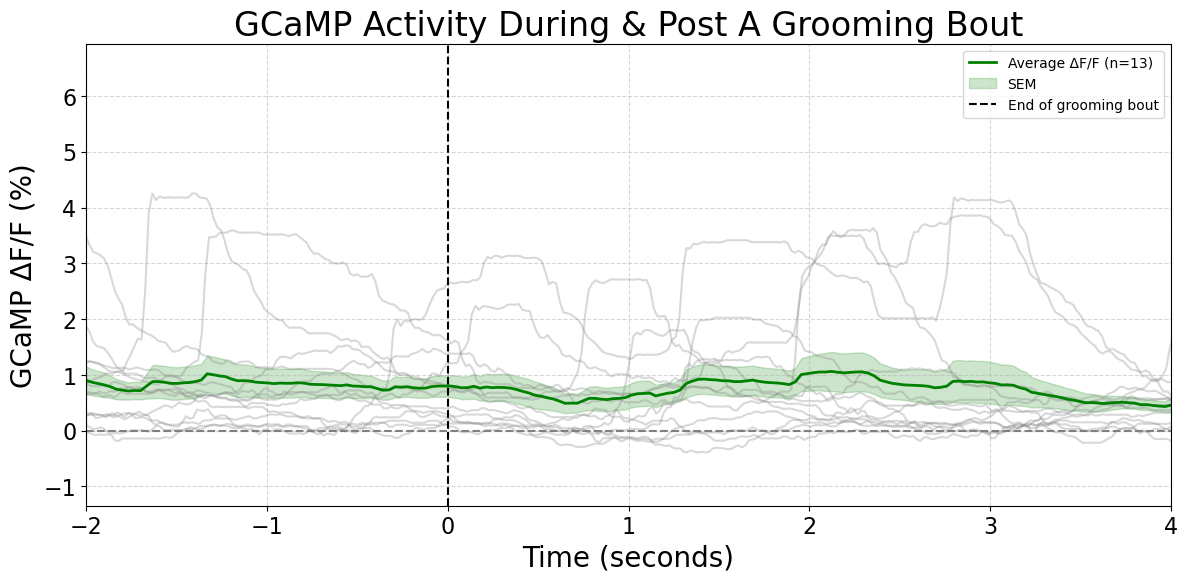

In [39]:
# Plot the average trace along with the individual traces and SEM
plt.figure(figsize=(14, 6))

# Plot individual traces
for gcamp_dF_F, aligned_time in aligned_filtered_traces:
    plt.plot(aligned_time, gcamp_dF_F, alpha=0.3, color='gray')

# Plot the average trace
plt.plot(avg_time, avg_deltaF_during_after, color='green', linewidth=2, label=f'Average ΔF/F (n={len(filtered_bouts)})')

# Plot the SEM as a shaded area around the average trace
plt.fill_between(avg_time, avg_deltaF_during_after - sem_deltaF_during_after, avg_deltaF_during_after + sem_deltaF_during_after, 
                 color='green', alpha=0.2, label='SEM')

# Plot aesthetics
plt.axvline(0, color='k', linestyle='--', label='End of grooming bout')  # Time zero line
plt.xlabel('Time (seconds)', fontsize=20)
plt.ylabel('GCaMP ΔF/F (%)', fontsize=20)
plt.title('GCaMP Activity During & Post A Grooming Bout', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-min_bout_length_seconds, post_bout_seconds)  # Show from during bout (negative) to post-bout (positive)
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()


Here we are doing the same but for HeaDipping

In [40]:
## This code is the same as the one above, but for headipping instead of grooming
# Access the raw headipping annotations
headipping_annotations = loaded_object.Headipping_annotations
print("Headipping Annotations:", headipping_annotations)

# Count the number of headipping bouts in raw annotations
headipping_annotations_count = len(headipping_annotations) if headipping_annotations else 0
print("Number of Headipping Bouts:", headipping_annotations_count)

Headipping Annotations: [(18232, 18302), (18330, 18359), (18380, 18405), (18424, 18444), (18608, 18638), (18681, 18744), (18777, 18820), (19023, 19063), (19107, 19134), (19331, 19364), (19378, 19412), (19537, 19577), (19615, 19655), (19672, 19700), (19771, 19818), (19834, 19864), (19870, 19885), (19933, 19973), (20172, 20205), (20226, 20248), (20292, 20330), (20679, 20715), (20733, 20749), (20850, 20881), (20912, 20943), (21060, 21084), (21105, 21166), (21219, 21262), (21362, 21388), (21604, 21640), (21756, 21859), (21865, 21886), (21917, 21942), (21988, 22031), (22033, 22062), (22500, 22515), (22690, 22759), (22925, 22990), (23021, 23135), (23223, 23250), (23488, 23528), (23802, 23836), (23977, 24001), (24110, 24153), (24187, 24205), (24253, 24277), (24283, 24359), (24603, 24659), (24715, 24747), (25043, 25060), (25136, 25162), (25209, 25257), (25318, 25405), (25501, 25511), (25553, 25598), (26042, 26071), (26227, 26239), (26341, 26363), (26414, 26444), (26583, 26620), (26632, 26715),

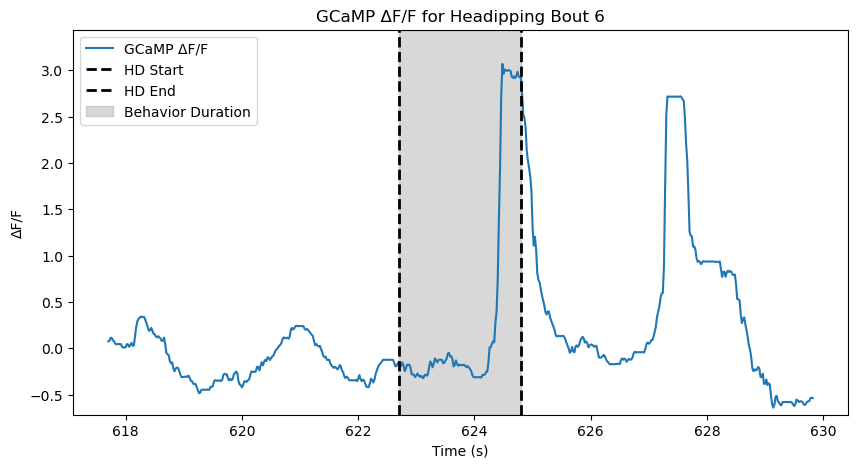

In [41]:
# Set the index of the desired headipping bout and extra time margins
bout_index = 5  # Change to the index of the headipping bout you want
extra_time_before = 5  # Extra seconds before the bout starts
extra_time_after = 5   # Extra seconds after the bout ends

# Load ΔF/F and time data for the specified bout
gcamp_data = loaded_object.get_gcamp_data_for_annotations(
    categories=["Headipping_annotations"],  # Specify the category
    n=bout_index + 1,  # Ensure we get at least this many bouts
    extra_time_before=extra_time_before,
    extra_time_after=extra_time_after
)

# Extract the list of (gcamp_dF_F, time_seconds) tuples for headipping_annotations
headipping_bouts = gcamp_data.get("Headipping_annotations", [])

# Ensure the requested bout index is within range
if bout_index >= len(headipping_bouts):
    raise IndexError(f"Bout index {bout_index} is out of range. Only {len(headipping_bouts)} bouts available.")

# Unpack the data for the chosen bout
gcamp_dF_F, time_seconds = headipping_bouts[bout_index]

# Fetch the start and end frames for the chosen bout
start_frame, end_frame = loaded_object.Headipping_annotations[bout_index]  # Use the property

# Convert frames to seconds (assuming 30 fps)
start_time = start_frame / 30.0
end_time = end_frame / 30.0

# Calculate dynamic y-axis limits with a 10% margin
y_min = min(gcamp_dF_F) - 0.12 * abs(min(gcamp_dF_F))
y_max = max(gcamp_dF_F) + 0.12 * abs(max(gcamp_dF_F))

# Plot the ΔF/F trace
plt.figure(figsize=(10, 5))
plt.plot(time_seconds, gcamp_dF_F, label='GCaMP ΔF/F')

# Mark the start and end of the behavioral event
plt.axvline(start_time, color='k', linestyle='--', linewidth=2, label='HD Start')
plt.axvline(end_time, color='k', linestyle='--', linewidth=2, label='HD End')

# Highlight the event duration
plt.fill_betweenx(
    [y_min, y_max], start_time, end_time, color='gray', alpha=0.3, label='Behavior Duration'
)

# Add labels, legend, and title
plt.xlabel('Time (s)')
plt.ylabel('ΔF/F')
plt.title(f'GCaMP ΔF/F for Headipping Bout {bout_index + 1}')
plt.legend()

# Set dynamic y-axis limits
plt.ylim(y_min, y_max)

# Show the plot
plt.show()

In [42]:
#  Define parameters
frame_rate = 30  # frames per second
min_bout_length_seconds = 0.5
min_frame_length = frame_rate * min_bout_length_seconds

# Ensure headipping annotations exist in the loaded object
if not loaded_object.Headipping_annotations:
    print("No headipping annotations available.")
else:
    # Filter headipping bouts longer than the minimum length
    valid_bouts = [(start, end) for start, end in loaded_object.Headipping_annotations if (end - start) >= min_frame_length]

    # Initialize a list to store the results
    headipping_traces = []

    # Extract GCaMP data for each valid bout
    for start_frame, end_frame in valid_bouts:
        gcamp_dF_F, time_seconds = loaded_object.get_gcamp_data(start_frame, end_frame)
        headipping_traces.append((gcamp_dF_F, time_seconds))

    # Print the results
    print(f"Number of headipping bouts longer than {min_bout_length_seconds} seconds ({min_frame_length} frames): {len(valid_bouts)}")
    print("Frame ranges of valid bouts:", valid_bouts)

Number of headipping bouts longer than 0.5 seconds (15.0 frames): 79
Frame ranges of valid bouts: [(18232, 18302), (18330, 18359), (18380, 18405), (18424, 18444), (18608, 18638), (18681, 18744), (18777, 18820), (19023, 19063), (19107, 19134), (19331, 19364), (19378, 19412), (19537, 19577), (19615, 19655), (19672, 19700), (19771, 19818), (19834, 19864), (19870, 19885), (19933, 19973), (20172, 20205), (20226, 20248), (20292, 20330), (20679, 20715), (20733, 20749), (20850, 20881), (20912, 20943), (21060, 21084), (21105, 21166), (21219, 21262), (21362, 21388), (21604, 21640), (21756, 21859), (21865, 21886), (21917, 21942), (21988, 22031), (22033, 22062), (22500, 22515), (22690, 22759), (22925, 22990), (23021, 23135), (23223, 23250), (23488, 23528), (23802, 23836), (23977, 24001), (24110, 24153), (24187, 24205), (24253, 24277), (24283, 24359), (24603, 24659), (24715, 24747), (25043, 25060), (25136, 25162), (25209, 25257), (25318, 25405), (25553, 25598), (26042, 26071), (26341, 26363), (2641

In [43]:
# Define the pre-bout check duration and frame-related variables
pre_bout_seconds = 1  # Check for headipping within this time before each bout
pre_bout_frames = pre_bout_seconds * frame_rate  # Convert to frames

# Initialize the list for filtered bouts
filtered_bouts = []

# Loop over valid bouts and filter out those with headipping bouts in the 10 seconds before
for start_frame, end_frame in valid_bouts:
    # Check if any other headipping bout ends within the 10-second window before this bout starts
    has_headipping_before = any(
        other_end_frame > (start_frame - pre_bout_frames) and other_end_frame <= start_frame
        for other_start_frame, other_end_frame in loaded_object.Headipping_annotations
        if (other_start_frame, other_end_frame) != (start_frame, end_frame)
    )

    # If no headipping bout is found within the 10-second window, add the bout to filtered_bouts
    if not has_headipping_before:
        filtered_bouts.append((start_frame, end_frame))

# Output results
print(f"Number of filtered bouts: {len(filtered_bouts)}")
print("Frame ranges of filtered bouts:", filtered_bouts)

Number of filtered bouts: 63
Frame ranges of filtered bouts: [(18232, 18302), (18608, 18638), (18681, 18744), (18777, 18820), (19023, 19063), (19107, 19134), (19331, 19364), (19537, 19577), (19615, 19655), (19771, 19818), (19933, 19973), (20172, 20205), (20292, 20330), (20679, 20715), (20850, 20881), (20912, 20943), (21060, 21084), (21219, 21262), (21362, 21388), (21604, 21640), (21756, 21859), (21917, 21942), (21988, 22031), (22500, 22515), (22690, 22759), (22925, 22990), (23021, 23135), (23223, 23250), (23488, 23528), (23802, 23836), (23977, 24001), (24110, 24153), (24187, 24205), (24253, 24277), (24603, 24659), (24715, 24747), (25043, 25060), (25136, 25162), (25209, 25257), (25318, 25405), (25553, 25598), (26042, 26071), (26341, 26363), (26414, 26444), (26583, 26620), (26746, 26779), (26824, 26857), (27426, 27444), (27657, 27711), (28488, 28548), (28732, 28771), (29025, 29064), (29829, 29869), (30547, 30569), (30699, 30750), (30785, 30812), (30877, 30945), (31060, 31114), (31250, 31

In [44]:
# Extract traces including the pre-bout period for each filtered headipping bout
filtered_traces = []
for start_frame, end_frame in filtered_bouts:
    # Include the pre-bout period
    extended_start_frame = max(0, start_frame - pre_bout_frames)

    # Get GCaMP data for the full extended frame range
    gcamp_dF_F, time_seconds = loaded_object.get_gcamp_data(extended_start_frame, end_frame)

    # Validate and truncate the trace if necessary to remove any extra frames
    expected_trace_length = (end_frame - extended_start_frame) + 1  # Total expected frames
    if len(gcamp_dF_F) > expected_trace_length:
        gcamp_dF_F = gcamp_dF_F[:expected_trace_length]
        time_seconds = time_seconds[:expected_trace_length]

    # Append the truncated trace
    filtered_traces.append((gcamp_dF_F, time_seconds))

# Find the shortest headipping bout from the filtered bouts
shortest_bout = min(filtered_bouts, key=lambda bout: bout[1] - bout[0])

# Calculate the length of the shortest bout in frames and seconds
shortest_bout_length_frames = shortest_bout[1] - shortest_bout[0]
shortest_bout_length_seconds = shortest_bout_length_frames / frame_rate

# Output results
print(f"Shortest headipping bout length: {shortest_bout_length_frames} frames ({shortest_bout_length_seconds:.2f} seconds)")

Shortest headipping bout length: 15 frames (0.50 seconds)


In [45]:
# Define the threshold percentile (e.g., allow up to 10% of the values to remain below zero)
# percentile_threshold  = 100

# Initialize a list to store aligned and shifted traces
aligned_filtered_traces = []

# Align each headipping bout to time zero and include pre-bout data
for start_frame, end_frame in filtered_bouts:
    # Calculate the extended start frame to include the pre-bout period
    extended_start_frame = max(0, start_frame - pre_bout_frames)

    # Get GCaMP data from the extended start frame to the end of the bout
    gcamp_dF_F, time_seconds = loaded_object.get_gcamp_data(extended_start_frame, end_frame)

    # Calculate the start time of the headipping bout relative to the extended data
    bout_start_time = start_frame / frame_rate

    # Align the time array to make bout start time equal to zero
    aligned_time = time_seconds - bout_start_time

    # Check if more than 10% of the values are below zero
    below_zero_count = np.sum(gcamp_dF_F < 0)
    percent_below_zero = (below_zero_count / len(gcamp_dF_F)) * 100

    # if percent_below_zero > percentile_threshold:
    #     # Calculate the 10th percentile value
    #     shift_value = np.percentile(gcamp_dF_F, percentile_threshold)

    #     # Only shift if the 10th percentile value is negative
    #     if shift_value < 0:
    #         gcamp_dF_F -= shift_value  # Shift to ensure only 10% remains below zero

    # Store the aligned and shifted trace
    aligned_filtered_traces.append((gcamp_dF_F, aligned_time))

# The traces are now properly aligned and shifted as per the threshold requirement

# Generate the time points for the entire trace (pre-bout to end of shortest bout)
avg_time = np.linspace(-pre_bout_seconds, min_bout_length_seconds, int((pre_bout_seconds + min_bout_length_seconds) * frame_rate))

# Initialize a list to store interpolated traces
interpolated_traces = []

# Interpolate each trace onto the common time points
for gcamp_dF_F, aligned_time in aligned_filtered_traces:
    # Interpolate the trace to match the common time points
    interpolated_trace = np.interp(avg_time, aligned_time, gcamp_dF_F)
    interpolated_traces.append(interpolated_trace)

# Convert to a NumPy array for vectorized operations
interpolated_traces = np.array(interpolated_traces)

# Compute the average trace
avg_deltaF_before_during = np.mean(interpolated_traces, axis=0)

# Compute the standard deviation (SD)
std_deltaF = np.std(interpolated_traces, axis=0)

# Compute the standard error of the mean (SEM)
sem_deltaF = std_deltaF / np.sqrt(interpolated_traces.shape[0])

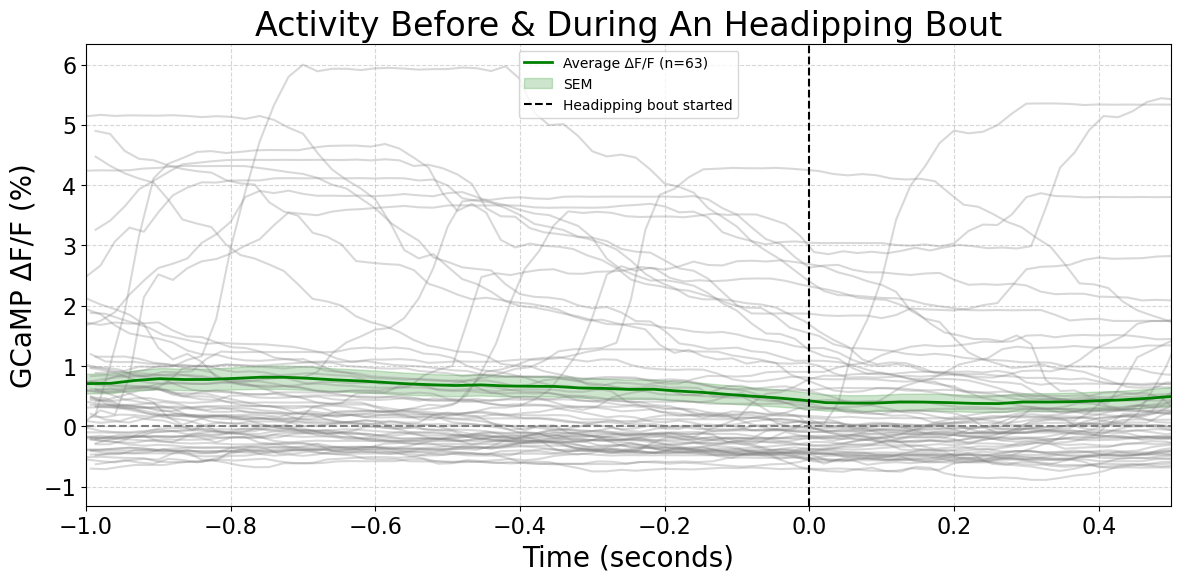

In [46]:
# Plot the average trace along with the individual traces
plt.figure(figsize=(14, 6))

# Plot individual traces
for gcamp_dF_F, aligned_time in aligned_filtered_traces:
    plt.plot(aligned_time, gcamp_dF_F, alpha=0.3, color='gray')

# Plot the average trace
plt.plot(avg_time, avg_deltaF_before_during, color='green', linewidth=2, label=f'Average ΔF/F (n={len(filtered_bouts)})')

# Plot SEM as a shaded area around the average trace
plt.fill_between(avg_time, avg_deltaF_before_during - sem_deltaF, avg_deltaF_before_during + sem_deltaF, 
                 color='green', alpha=0.2, label='SEM')

# Plot aesthetics
plt.axvline(0, color='k', linestyle='--', label='Headipping bout started')  # Time zero line
plt.xlabel('Time (seconds)', fontsize=20)
plt.ylabel('GCaMP ΔF/F (%)', fontsize=20)
plt.title('Activity Before & During An Headipping Bout', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-pre_bout_seconds, min_bout_length_seconds)  # Show from pre-bout to end of shortest bout
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

Number of headipping bouts longer than 1 seconds (30 frmaes): 52
Frame ranges of valid bouts: [(18232, 18302), (18608, 18638), (18681, 18744), (18777, 18820), (19023, 19063), (19331, 19364), (19378, 19412), (19537, 19577), (19615, 19655), (19771, 19818), (19834, 19864), (19933, 19973), (20172, 20205), (20292, 20330), (20679, 20715), (20850, 20881), (20912, 20943), (21105, 21166), (21219, 21262), (21604, 21640), (21756, 21859), (21988, 22031), (22690, 22759), (22925, 22990), (23021, 23135), (23488, 23528), (23802, 23836), (24110, 24153), (24283, 24359), (24603, 24659), (24715, 24747), (25209, 25257), (25318, 25405), (25553, 25598), (26414, 26444), (26583, 26620), (26632, 26715), (26746, 26779), (26824, 26857), (26869, 26989), (27657, 27711), (28488, 28548), (28732, 28771), (29025, 29064), (29829, 29869), (30699, 30750), (30877, 30945), (31060, 31114), (31250, 31301), (34037, 34142), (34251, 34290), (34494, 34571)]
Number of filtered bouts: 40
Frame ranges of filtered bouts: [(18608, 186

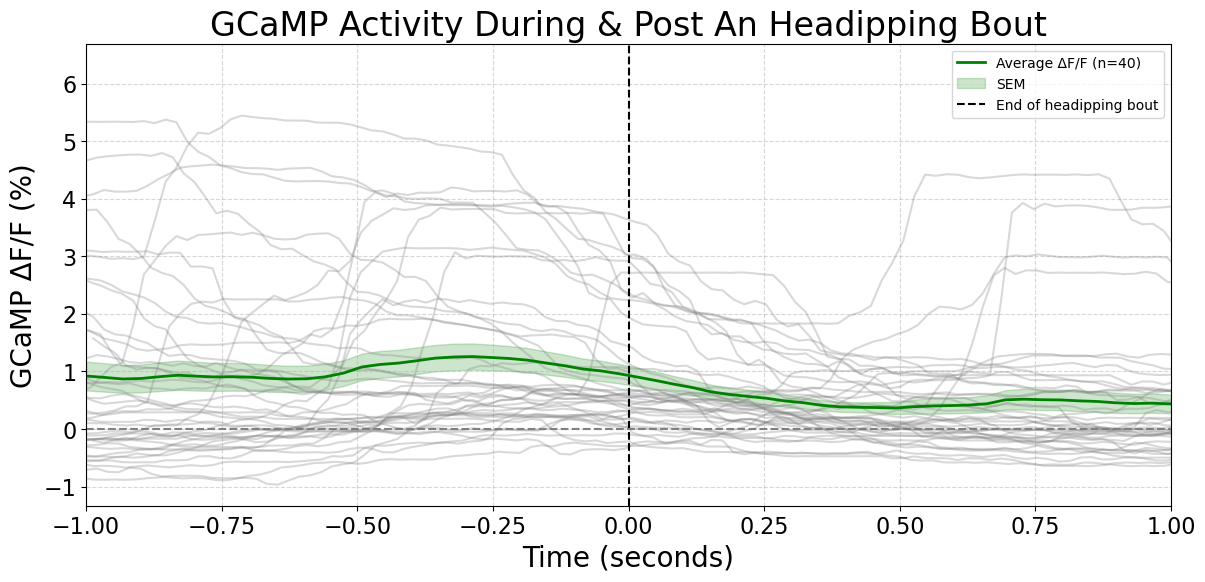

In [47]:
# This code detects headipping bouts by their duration (if they are longer than x)

#  Define parameters
min_bout_length_seconds = 1
min_frame_length = frame_rate * min_bout_length_seconds

# Ensure headipping annotations exist in the loaded object
if not loaded_object.Headipping_annotations:
    raise ValueError("No headipping annotations available.")
else:
    # Filter headipping bouts longer than the minimum length
    valid_bouts = [(start, end) for start, end in loaded_object.Headipping_annotations if (end - start) >= min_frame_length]

    # Print the results
    print(f"Number of headipping bouts longer than {min_bout_length_seconds} seconds ({min_frame_length} frmaes): {len(valid_bouts)}")
    print("Frame ranges of valid bouts:", valid_bouts)

# Define the post-bout check duration and frame-related variables
post_bout_seconds = 1  # Check for headipping within this time after each bout
post_bout_frames = post_bout_seconds * frame_rate  # Convert to frames

# Initialize the list for filtered bouts
filtered_bouts = []

# Loop over valid bouts and filter out those with headipping bouts in the post-bout window
filtered_bouts = [
    (start_frame, end_frame) for start_frame, end_frame in valid_bouts
    if not any(other_start_frame < (end_frame + post_bout_frames) and other_start_frame >= end_frame
               for other_start_frame, _ in loaded_object.Headipping_annotations
               if (other_start_frame, _) != (start_frame, end_frame))
]

if not filtered_bouts:
    print("No filtered bouts available.")
else:
    shortest_bout = min(filtered_bouts, key=lambda bout: bout[1] - bout[0])

# Extract traces including the post-bout window for each filtered bout
filtered_traces = []
for start_frame, end_frame in filtered_bouts:
    # Include the post-bout window (post_bout_frames) after the bout
    extended_end_frame = end_frame + post_bout_frames
    gcamp_dF_F, time_seconds = loaded_object.get_gcamp_data(start_frame, extended_end_frame)
    filtered_traces.append((gcamp_dF_F, time_seconds))

# Find the shortest bout from the filtered bouts
shortest_bout = min(filtered_bouts, key=lambda bout: bout[1] - bout[0])

# Calculate the length of the shortest bout in frames and seconds
shortest_bout_length_frames = shortest_bout[1] - shortest_bout[0]
shortest_bout_length_seconds = shortest_bout_length_frames / frame_rate

# Output results
print(f"Number of filtered bouts: {len(filtered_bouts)}")
print("Frame ranges of filtered bouts:", filtered_bouts)
print(f"Shortest bout length: {shortest_bout_length_frames} frames ({shortest_bout_length_seconds:.2f} seconds)")

# Initialize a list to store aligned traces
aligned_filtered_traces = []

# Align each bout to time zero, using the end of the bout as the zero point
for start_frame, end_frame in filtered_bouts:

    # Get GCaMP data from the extended start frame to the end of the bout
    gcamp_dF_F, time_seconds = loaded_object.get_gcamp_data(start_frame, extended_end_frame)

    # Calculate the time corresponding to the end frame of the headipping bout
    bout_end_time = end_frame / frame_rate  # Convert end frame to seconds

    # Align the time array to make the end time of the bout equal to zero
    aligned_time = time_seconds - bout_end_time

    # Store the aligned trace without shifting
    aligned_filtered_traces.append((gcamp_dF_F, aligned_time))

# The traces are now properly aligned to the end of the bout
# Define the time range for averaging
avg_time = np.linspace(-min_bout_length_seconds, post_bout_seconds, int((min_bout_length_seconds + post_bout_seconds) * frame_rate))

# Initialize a list to store interpolated traces
interpolated_traces = []

# Interpolate each trace onto the common time points, aligned to the bout end
for gcamp_dF_F, aligned_time in aligned_filtered_traces:
    # Interpolate the trace to match the common time points
    interpolated_trace = np.interp(avg_time, aligned_time, gcamp_dF_F)
    interpolated_traces.append(interpolated_trace)

# Compute the average trace
avg_deltaF_during_after = np.nanmean(interpolated_traces, axis=0)

# Define the time range for averaging
avg_time = np.linspace(-min_bout_length_seconds, post_bout_seconds, int((min_bout_length_seconds + post_bout_seconds) * frame_rate))

# Initialize a list to store interpolated traces
interpolated_traces = []

# Interpolate each trace onto the common time points, aligned to the bout end
for gcamp_dF_F, aligned_time in aligned_filtered_traces:
    # Interpolate the trace to match the common time points
    interpolated_trace = np.interp(avg_time, aligned_time, gcamp_dF_F)
    interpolated_traces.append(interpolated_trace)

# Convert the list of interpolated traces to a NumPy array
interpolated_traces = np.array(interpolated_traces)

# Compute the average, standard deviation, and SEM of the interpolated traces
if interpolated_traces.size > 0:
    avg_deltaF_during_after = np.nanmean(interpolated_traces, axis=0)
    std_deltaF_during_after = np.nanstd(interpolated_traces, axis=0)
    sem_deltaF_during_after = std_deltaF_during_after / np.sqrt(interpolated_traces.shape[0])
else:
    print("Warning: No valid interpolated traces available.")
    avg_deltaF_during_after = std_deltaF_during_after = sem_deltaF_during_after = None

# Plot the average trace along with the individual traces and SEM
plt.figure(figsize=(14, 6))

# Plot individual traces
for gcamp_dF_F, aligned_time in aligned_filtered_traces:
    plt.plot(aligned_time, gcamp_dF_F, alpha=0.3, color='gray')

# Plot the average trace
plt.plot(avg_time, avg_deltaF_during_after, color='green', linewidth=2, label=f'Average ΔF/F (n={len(filtered_bouts)})')

# Plot the SEM as a shaded area around the average trace
plt.fill_between(avg_time, avg_deltaF_during_after - sem_deltaF_during_after, avg_deltaF_during_after + sem_deltaF_during_after, 
                 color='green', alpha=0.2, label='SEM')

# Plot aesthetics
plt.axvline(0, color='k', linestyle='--', label='End of headipping bout')  # Time zero line
plt.xlabel('Time (seconds)', fontsize=20)
plt.ylabel('GCaMP ΔF/F (%)', fontsize=20)
plt.title('GCaMP Activity During & Post An Headipping Bout', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-min_bout_length_seconds, post_bout_seconds)  # Show from during bout (negative) to post-bout (positive)
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()
